In [2]:
def exp(b, n):
    if n == 0:
        return 1
    else:
        return b * exp(b, n - 1)


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', size=16)

from timeit import repeat
from numpy import median

def plot_times(name, xs, n=15):
    f = lambda x: name + '(' + str(x) + ')'
    g = globals()

    samples = []
    for _ in range(n):
        times = lambda x: repeat(f(x), globals=g, number=1, repeat=n)
        samples.append([median(times(x)) for x in xs])
    ys = [10e3 * median(sample) for sample in zip(*samples)]

    plt.figure(figsize=(8, 8))
    plt.plot(xs, ys)
    plt.xlabel('n')
    plt.ylabel('milliseconds')

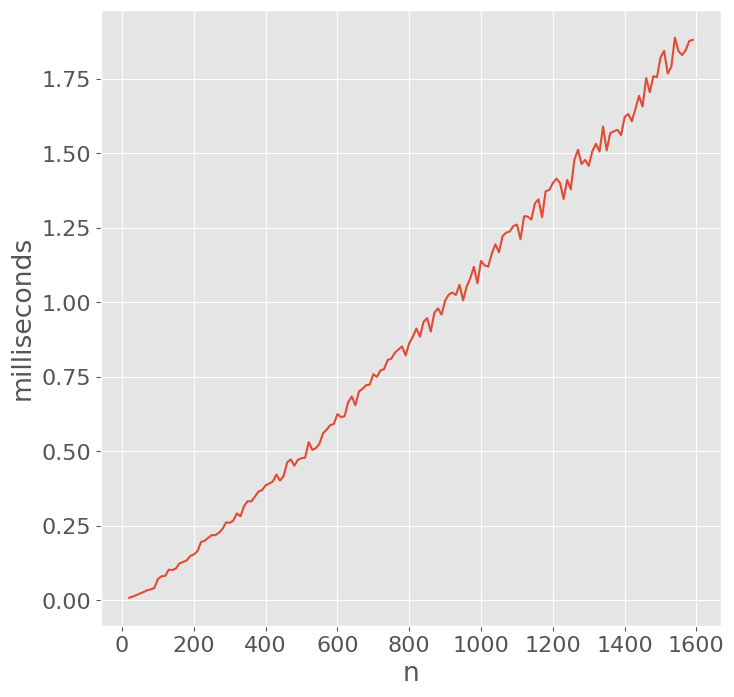

In [9]:
exp_2 = lambda n: exp(2, n)
plot_times('exp_2', list(range(20, 1600, 10)))

In [10]:
def exp_fast(b, n):
    if n == 0:
        return 1
    elif n % 2 == 0:
        return square(exp_fast(b, n // 2))
    else:
        return b * exp_fast(b, n - 1)


def square(x):
    return x * x

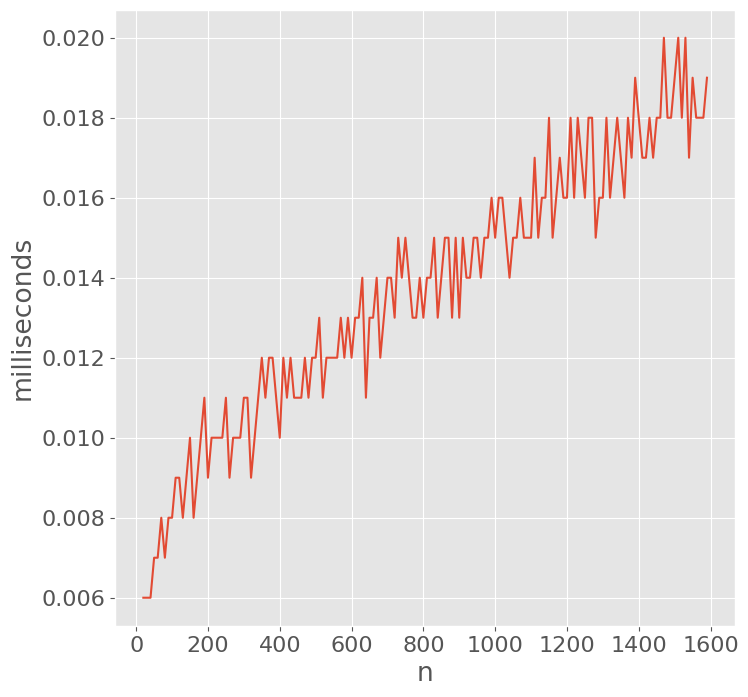

In [11]:
exp_2_fast = lambda n: exp_fast(2, n)
plot_times('exp_2_fast', list(range(20, 1600, 10)))